In [9]:
import numpy as np
from scipy import misc
from imageio import imread
import matplotlib.pyplot as plt

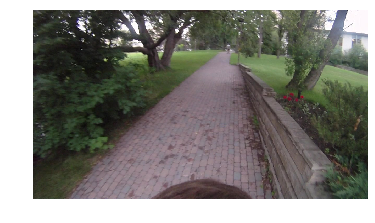

In [169]:
image = imread('1-img.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

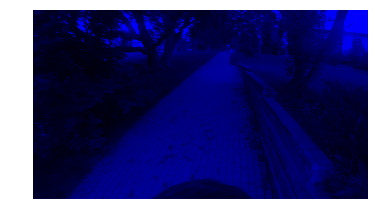

In [175]:
img_b = image
img_b[:,:,:2] = 0
plt.imshow(img_b)
plt.axis('off')
plt.show()

The image consists of a 3d array where the third dimension denotes the channels in the image. Here the channels are red, green and blue, denoting the intensity of each color in the image. If a single of these channels is drawn, then we get the same image in terms of the intensity of a single channel, above for example the blue channel.

In [155]:
fc = np.array([ 578.952814872337060, 585.355122127640240 ])

cc = np.array([ 645.829043343746890, 366.668100334605700 ])

# Skew coefficient:
alpha_c = 0.000000000000000

# Distortion coefficients:
kc = np.array([ -0.177503624372297, 0.000000000000000, -0.000567136821985, 0.004381118840596, 0.000000000000000 ])

# Focal length uncertainty:
fc_error = np.array([ 5.537802906545395, 5.922529844110954 ])

# Principal point uncertainty:
cc_error = np.array([ 4.131449044202678, 3.633085836989010 ])

# Skew coefficient uncertainty:
alpha_c_error = 0.000000000000000

# Distortion coefficients uncertainty:
kc_error = np.array([ 0.003714894427521, 0.000000000000000, 0.000863143593786, 0.001101711180444, 0.000000000000000 ])

# Image size:
nx = 1280
ny = 720


In [156]:
K = np.array([
    [fc[0], alpha_c, cc[0]],
    [0, fc[1], cc[1]],
    [0, 0, 1]
]); K

array([[578.95281487,   0.        , 645.82904334],
       [  0.        , 585.35512213, 366.66810033],
       [  0.        ,   0.        ,   1.        ]])

In [218]:
def get_projection(translation, rotate=0):
    proj = np.array([
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,0]
    ])
    rot = np.array([
        [np.cos(rotate), -np.sin(rotate),0 , 0],
        [np.sin(rotate), np.cos(rotate), 0, 0],
        [0, 0, 1, 0],
        [0,0,0, 1]
    ])
    trans = np.array([
        [1,0,0, -translation[0]],
        [0,1,0, -translation[1]],
        [0,0,1, -translation[2]],
        [0,0,0, 1]
    ])
    
    return np.matmul(K, (np.matmul(np.matmul(proj, rot), trans)))
    
def count_proj(translation, rotation =0 ):
    prj = get_projection(translation, rotation)
    res = np.matmul(prj, [0,0,1,1])
    res = res / res[2]
    return res
    
    
def count_projs():
    print(count_proj([0, 0, 3], 0))
    print(count_proj([0, 0, 5], 0))
    print('no rotation',count_proj( [0.5, 1, 3], 0))
    print(count_proj([0.5, 1, 3], 20))
    print('no rotation',count_proj( [15, 1, 3], 0))
    print(count_proj([15, 1, 3], 20))
    
count_projs()

[645.82904334 366.66810033   1.        ]
[645.82904334 366.66810033   1.        ]
no rotation [790.56724706 659.3456614    1.        ]
[440.61799657 619.70385758   1.        ]
no rotation [4.98797515e+03 6.59345661e+02 1.00000000e+00]
[2.15350487e+03 4.49408340e+03 1.00000000e+00]


We can see that the object directly in front of the center of the camera gets mapped to the center pixel despite how far away it is.

When rotated, in this case along z-axis the resulting numbers are lower than those without rotation. Since it seems that the coordinates that are produced have origin (0,0) at bottom left of the image so the fact that the numbers go down means that the entities are more to the bottom and more to the center. The other point, which is located much further away from the camera, the points are way out of the actual camera's view. Also the rotation is relatively much more significant to the coordinates of the point that is further away than the point that is closer by.

In [65]:
A = np.array([
    [5,1,0,0],
    [7,0,1,0],
    [0,0,12,1]
])

np.linalg.svd(A)

(array([[-0.03982068,  0.58641204,  0.80903352],
        [-0.13728406,  0.79878639, -0.58574174],
        [-0.98973097, -0.13439204,  0.04869681]]),
 array([12.11051203,  8.58344699,  0.81236459]),
 array([[-0.09579214, -0.00328811, -0.99203533, -0.08172495],
        [ 0.99302354,  0.06831894, -0.09482415, -0.01565712],
        [-0.06773387,  0.99589954, -0.00169875,  0.05994453],
        [ 0.01184199, -0.05920996, -0.08289395,  0.99472737]]))

In [201]:
np.dot(A.T, A)

array([[ 74,   5,   7,   0],
       [  5,   1,   0,   0],
       [  7,   0, 145,  12],
       [  0,   0,  12,   1]])

In [202]:
np.dot(A, A.T)

array([[ 26,  35,   0],
       [ 35,  50,  12],
       [  0,  12, 145]])